In [37]:
import pandas as pd
import glob
 
# Load all files
#file_paths = glob.glob("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final/*.csv")
 
# Select 4 venues for training
train_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ylläs_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Serena_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ruka_final.csv"]
train_dfs = [pd.read_csv(f) for f in train_venues]
 
# Combine into one training dataset
df_train = pd.concat(train_dfs, ignore_index=True)
 
# Select 1 venue for testing
test_venue = "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
print(df_train.shape, df_test.shape)  # Check sizes

(29587, 8) (7305, 8)


<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:18: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:18: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\2673594115.py:8: SyntaxWarning: invalid escape sequence '\C'
  train_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ylläs_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\2673594115.py:9: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056

In [38]:
df_train.fillna(method="ffill", inplace=True)

df_test.fillna(method="ffill", inplace=True)
 

C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\3689902241.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train.fillna(method="ffill", inplace=True)
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\3689902241.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.fillna(method="ffill", inplace=True)


In [39]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
 
# Create a polynomial regression model (degree=2)
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
# Train the model
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")  # Lower MAE & higher R² is better

MAE: 10.694524041523984, R²: 0.4534892803922338


In [41]:
df_test.isna().sum()

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
dtype: int64

In [42]:
import joblib
 
# Save the trained model
joblib.dump(model, "polynomial_regression_snow_model.pkl")
 
# Load the model later for predictions
loaded_model = joblib.load("polynomial_regression_snow_model.pkl")

In [43]:
# Load the remaining 5 venue datasets
remaining_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Mustavaara_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Pyhätunturi_final.csv"]
df_remaining = pd.concat([pd.read_csv(f) for f in remaining_venues], ignore_index=True)
 
# Fill missing values
df_remaining.fillna(method="ffill", inplace=True)
df_remaining.fillna(method="bfill", inplace=True)
 
# Predict snow depth for these venues
df_remaining["Predicted Snow Depth [cm]"] = loaded_model.predict(df_remaining[features])
 
# Save the results
df_remaining.to_csv("predicted_snow_conditions.csv", index=False)
 
print(df_remaining.head())  # Check predictions

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\1434393574.py:2: SyntaxWarning: invalid escape sequence '\C'
  remaining_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\1434393574.py:3: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_30056\1434393574.py:4: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachi

         Date  cloud_cover_code  Precipitation amount [mm]  Snow depth [cm]  \
0  2005-01-02               3.0                        4.2             15.0   
1  2005-01-03               3.0                        0.8             19.0   
2  2005-01-04               3.0                        1.8             19.0   
3  2005-01-05               3.0                        6.2             20.0   
4  2005-01-06               3.0                        5.0             27.0   

   Average temperature [°C]  Direct solar radiation mean [W/m2]  \
0                       0.2                                 1.1   
1                      -1.4                                 0.7   
2                      -1.8                                 1.8   
3                      -1.5                                 1.8   
4                      -1.3                                 1.7   

   days_above_10cm  days_above_20cm  Predicted Snow Depth [cm]  
0                1                0                  13.8

In [44]:
df_remaining.isna().sum()

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Predicted Snow Depth [cm]             0
dtype: int64

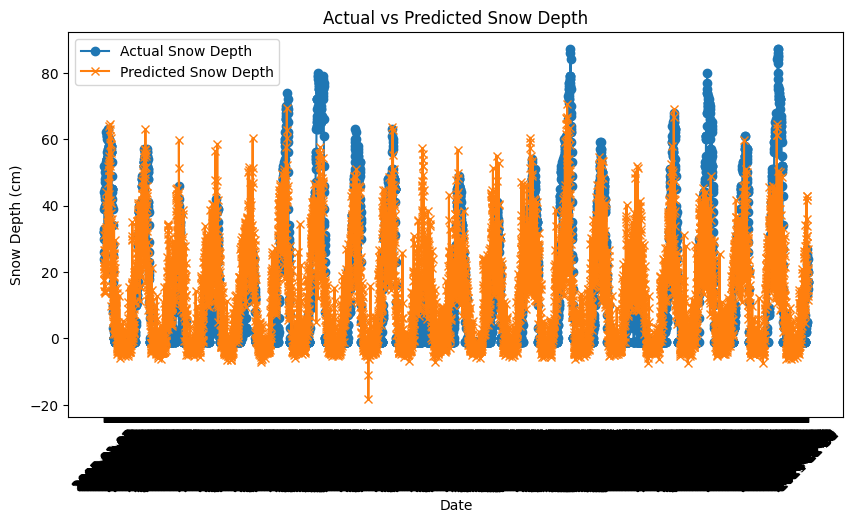

In [45]:
import matplotlib.pyplot as plt
 
# Plot actual vs predicted snow depth
plt.figure(figsize=(10, 5))
plt.plot(df_test["Date"], y_test, label="Actual Snow Depth", marker='o')
plt.plot(df_test["Date"], y_pred, label="Predicted Snow Depth", marker='x')
 
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Actual vs Predicted Snow Depth")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"Mean Absolute Error (MAE): {mae:.2f} cm")
print(f"Mean Squared Error (MSE): {mse:.2f} cm²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} cm")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 10.69 cm
Mean Squared Error (MSE): 237.07 cm²
Root Mean Squared Error (RMSE): 15.40 cm
R² Score: 0.453


In [48]:
df_test["Prediction Error"] = abs(y_test - y_pred)
df_test_sorted = df_test.sort_values("Prediction Error", ascending=False)
 
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].head(10))
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].tail(10))

            Date  Snow depth [cm]  Prediction Error
6993  2024-02-25             85.0         72.238795
4841  2018-04-05             84.0         72.049591
6991  2024-02-23             85.0         69.753717
6990  2024-02-22             87.0         68.858994
6992  2024-02-24             80.0         65.686520
6994  2024-02-26             78.0         65.444103
2281  2011-04-02             76.0         65.242483
4842  2018-04-06             75.0         64.100838
6988  2024-02-20             84.0         63.479434
2280  2011-04-01             77.0         62.066494
            Date  Snow depth [cm]  Prediction Error
1626  2009-06-16             -1.0          0.016415
895   2007-06-16             -1.0          0.015667
2047  2010-08-11             -1.0          0.015387
645   2006-10-09             -1.0          0.012630
5409  2019-10-25             -1.0          0.012185
5474  2019-12-29             21.0          0.010062
1873  2010-02-18             50.0          0.007643
1388  2008-1

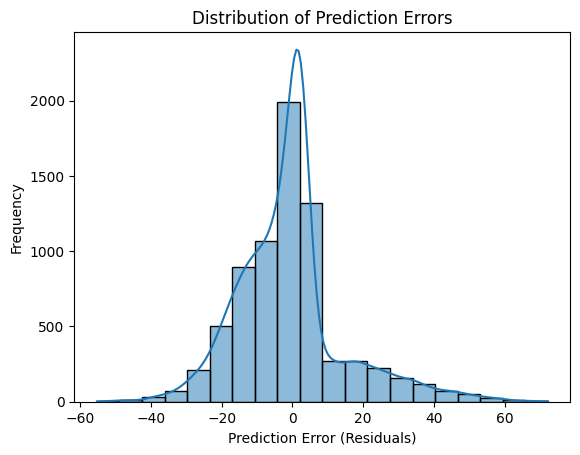

In [50]:
import seaborn as sns
 
residuals = y_test - y_pred  # Difference between actual and predicted

sns.histplot(residuals, bins=20, kde=True)

plt.xlabel("Prediction Error (Residuals)")

plt.ylabel("Frequency")

plt.title("Distribution of Prediction Errors")

plt.show()
 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
 
# Select features (X) and target variable (y)
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]
 
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")  # Lower MAE & higher R² is better

MAE: 9.193027143834945, R²: 0.4386243143704852
